<a href="https://colab.research.google.com/github/b1k-00/NFL_sql/blob/main/NFL_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NFL Queries using SQL**

In [114]:
!pip install pandasql
import pandas as pd
import pandasql as ps
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [115]:
players_df = pd.read_csv('players.csv')
players_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


**QUERY TO SHOW ALL QBs**

**bold text**

In [116]:
query = "SELECT * FROM players_df WHERE position = 'QB'"
qb_df = ps.sqldf(query, locals())
qb_df.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
2,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
3,33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco
4,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne


**Join Players & Tackles tables**

In [117]:
tackles_df = pd.read_csv('tackles.csv')
tackles_df.head()

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0


In [118]:
players_tackles_df = players_df.merge(tackles_df, on='nflId')
players_tackles_df.to_csv('players_tackles.csv')
players_tackles_df.head()


,nflId,height,weight,birthDate,collegeName,position,displayName,gameId,playId,tackle,assist,forcedFumble,pff_missedTackle
0,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022091107,1803,1,0,0,0
1,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022092505,1067,1,0,0,0
2,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022100202,2284,1,0,0,0
3,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022092505,654,1,0,0,0
4,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell,2022101606,2695,1,0,0,0


# **TOP TACKLERS**

**SAFETIES**

In [119]:
#VIEW ALL SAFETIES

query = """
SELECT displayName
FROM players_tackles_df
WHERE position = 'SS'
"""
ss_tackles = ps.sqldf(query, locals())
print(ss_tackles)


                   displayName
0               Kareem Jackson
1               Kareem Jackson
2               Kareem Jackson
3               Kareem Jackson
4               Kareem Jackson
5               Kareem Jackson
6               Kareem Jackson
7               Kareem Jackson
8               Kareem Jackson
9               Kareem Jackson
10              Kareem Jackson
11              Kareem Jackson
12              Kareem Jackson
13              Kareem Jackson
14              Kareem Jackson
15              Kareem Jackson
16              Kareem Jackson
17              Kareem Jackson
18              Kareem Jackson
19              Kareem Jackson
20              Kareem Jackson
21              Kareem Jackson
22              Kareem Jackson
23              Kareem Jackson
24              Kareem Jackson
25              Kareem Jackson
26              Kareem Jackson
27              Kareem Jackson
28              Kareem Jackson
29              Kareem Jackson
30              Kareem Jackson
31      

**Understanding the Data**

The data is stored in a different way it doesn't count up the tackles for us, so we will need to do that to see who our top tacklers are!

In [120]:
#ADD COUNT FOR EACH PLAYER NAME

query = """
SELECT displayName, COUNT(*) AS num_tackles
FROM players_tackles_df
WHERE position = 'SS'
GROUP BY displayName
ORDER BY num_tackles DESC
"""
ss_tackles_count = ps.sqldf(query, locals())
print(ss_tackles_count)


                 displayName  num_tackles
0                Budda Baker           80
1              Eddie Jackson           74
2               Richie Grant           69
3           Rayshawn Jenkins           67
4             Donovan Wilson           67
5             Jaquan Brisker           62
6             Kareem Jackson           60
7                Chuck Clark           60
8                Julian Love           57
9           Jordan Whitehead           56
10           Johnathan Abram           56
11              Damar Hamlin           56
12               Marcus Epps           53
13             Brandon Jones           53
14              Grant Delpit           52
15           Talanoa Hufanga           51
16  Chauncey Gardner-Johnson           51
17               Andre Cisco           50
18               Kamren Curl           46
19               Justin Reid           44
20            Harrison Smith           44
21                Nick Scott           43
22           Adrian Phillips      

**Finding Median**

Rather than listing all the SS who recorded a tackle, find the median to amount and build a graph based on that.

In [121]:
median_tackles = ss_tackles_count['num_tackles'].median()
print(f"Median number of tackles: {median_tackles}")

Median number of tackles: 31.0


**SQL QUERY to only show the SS with 31 or more tackles**

In [122]:
query = """
SELECT displayName, COUNT(*) AS num_tackles
FROM players_tackles_df
WHERE position = 'SS'
GROUP BY displayName
HAVING num_tackles >= 31
ORDER BY num_tackles DESC
"""
ss_tackles_count = ps.sqldf(query, locals())
print(ss_tackles_count)


                 displayName  num_tackles
0                Budda Baker           80
1              Eddie Jackson           74
2               Richie Grant           69
3           Rayshawn Jenkins           67
4             Donovan Wilson           67
5             Jaquan Brisker           62
6             Kareem Jackson           60
7                Chuck Clark           60
8                Julian Love           57
9           Jordan Whitehead           56
10           Johnathan Abram           56
11              Damar Hamlin           56
12               Marcus Epps           53
13             Brandon Jones           53
14              Grant Delpit           52
15           Talanoa Hufanga           51
16  Chauncey Gardner-Johnson           51
17               Andre Cisco           50
18               Kamren Curl           46
19               Justin Reid           44
20            Harrison Smith           44
21                Nick Scott           43
22           Adrian Phillips      

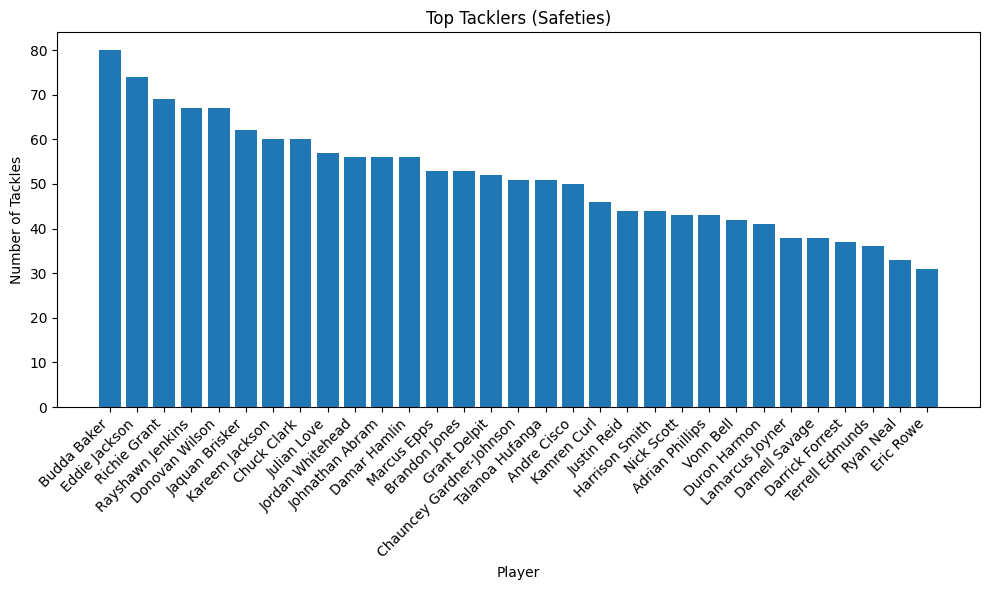

In [123]:
import matplotlib.pyplot as plt

#GRAPH
plt.figure(figsize=(10, 6))
plt.bar(ss_tackles_count_df['displayName'], ss_tackles_count_df['num_tackles'])

plt.title('Top Tacklers (Safeties)')
plt.xlabel('Player')
plt.ylabel('Number of Tackles')


plt.xticks(rotation=45, ha='right')

#SHOW
plt.tight_layout()
plt.show()